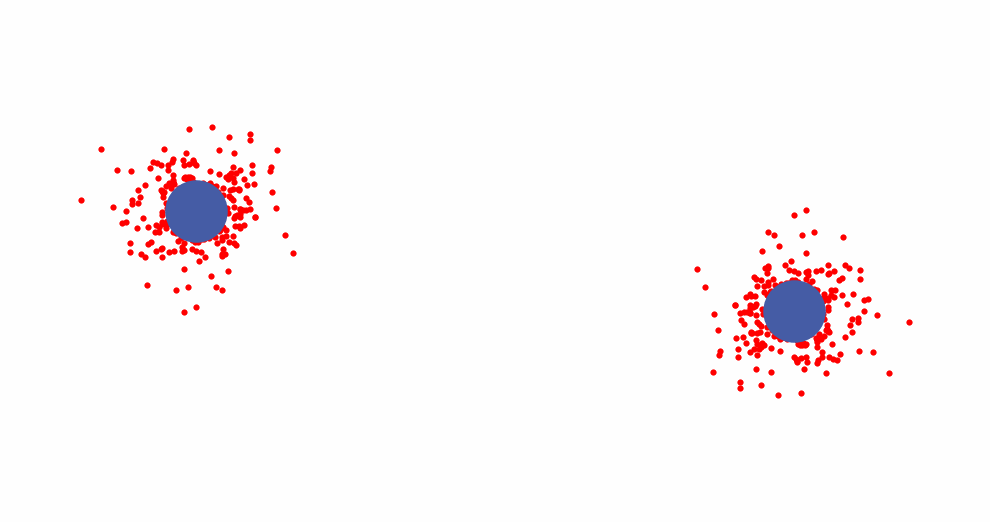

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import imageio as iio
import io
from IPython.display import Image

# Declare constants 
figwidth = 4
figheight = 2
dpi = 300
# Set the default figure size and dpi
plt.rcParams['figure.figsize'] = (figwidth, figheight)
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
# Turn off box around plots
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
# Turn off ticks
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False
# Set aspect ratio to 1
plt.rcParams['image.aspect'] = 'equal'


# Declare constants
yext = 1.5
xext = 9
xbord = 14
ybord = 7
xl = [-xbord, xbord]
yl = [-ybord, ybord]
N = 75 # Number of frames
M = 300 # Number of fermions
L = 1000 # Grid size
fw = 1 # Fermion cloud width
fg = 1 # Fermion radius
theta = 40 * 2 * np.pi / 360
bosonkwargs = {'markersize': 15, 'markerfacecolor': '#455ca6', 'markeredgewidth': 0}
fermikwargs = {'markersize': 3, 'markerfacecolor': 'red', 'markeredgewidth': 0}


# Create the x and y arrays
x = np.linspace(-xext, xext, N)
y = np.zeros(N) + yext

xpert = x * np.cos(theta)
ypert = yext - x * np.sin(theta)
mask = [i < N/2 for i in range(N)]

xpert[mask] = x[mask]
ypert[mask] = y[mask]


# Create an N x M array of random numbers
fx = fw * np.random.randn(N, M)
fy = fw * np.random.randn(N, M)
fx = fx + xpert[:, np.newaxis]
fy = fy + ypert[:, np.newaxis]

# Create an N x L x L array of zeros
grad = np.ones((N, L, L, 3))
gradx = np.linspace(-xbord, xbord, L)
grady = np.linspace(-ybord, ybord, L)
gradx, grady = np.meshgrid(gradx, grady)
for i in range(N):
    grad[i, :, :, 1] = 1-(np.exp(-((gradx - xpert[i])**2 + (grady - ypert[i])**2) / (2 * fg**2))
               + np.exp(-((gradx + xpert[i])**2 + (grady + ypert[i])**2) / (2 * fg**2)))
    grad[i, :, :, 2] = grad[i, :, :, 1]






########## PLOT 2 ##########

# Create a list of plots
plots = []
plt.figure()
fig = plt.gcf()
ax = plt.gca()
for i in range(N):
    # print(f'starting {i}')
    ax.cla()
    # Plot the current frame
    ax.plot(fx[i], fy[i], '.', **fermikwargs)
    ax.plot(-fx[i], -fy[i], '.', **fermikwargs)
    # ax.imshow(grad[i], extent=[-xbord, xbord, -ybord, ybord], cmap='Reds', origin='lower')
    ax.plot(xpert[i], ypert[i], 'o', **bosonkwargs)
    ax.plot(-xpert[i], -ypert[i], 'o', **bosonkwargs)
    ax.axis('equal')
    ax.set_xlim(xl)
    ax.set_ylim(yl)

    # Save the plot to a numpy array
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png',  bbox_inches='tight')
        buf.seek(0)
        img = iio.v2.imread(buf)
        # Append the plot to the list of plots
        plots.append(img)
    
    # Print the current frame number
    # print(f'ending {i}')

# Append a reversed copy of plots to the end 
plots += plots[::-1]

plt.close()
# Save the list of plots as a gif
iio.mimsave('bfmed2.gif', plots, 'GIF', loop=0, duration=1000/30)
# View the gif "plots.gif" inline in the notebook, looping forever
Image('bfmed2.gif', format='gif')





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

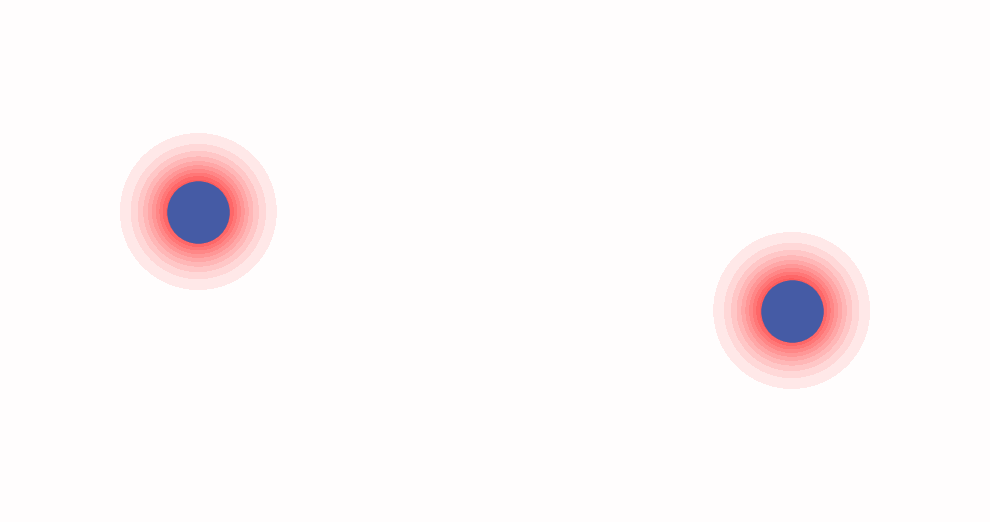

In [6]:
########## PLOT 1 ##########

# Create a list of plots
plots = []
plt.figure()
fig = plt.gcf()
ax = plt.gca()
for i in range(N):
    ax.cla()
    # Plot the current frame
    # ax.plot(fx[i], fy[i], '.', **fermikwargs)
    # ax.plot(-fx[i], -fy[i], '.', **fermikwargs)
    # ax.imshow(grad[i], extent=[-xbord, xbord, -ybord, ybord], cmap='Reds', origin='lower')
    ax.plot(x[i], y[i], 'o', **bosonkwargs)
    ax.plot(-x[i], -y[i], 'o', **bosonkwargs)
    ax.axis('equal')
    ax.set_xlim(xl)
    ax.set_ylim(yl)

    # Save the plot to a numpy array
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png',  bbox_inches='tight')
        buf.seek(0)
        img = iio.v2.imread(buf)
        # Append the plot to the list of plots
        plots.append(img)

# Append a reversed copy of plots to the end 
plots += plots[::-1]

plt.close()
# Save the list of plots as a gif
iio.mimsave('bfmed1.gif', plots, 'GIF', loop=0, duration=1000/30)
# View the gif "plots.gif" inline in the notebook, looping forever
Image('bfmed1.gif', format='gif')


########## PLOT 3 ##########


# Create a list of plots
plots = []
plt.figure()
fig = plt.gcf()
ax = plt.gca()
for i in range(N):
    ax.cla()
    # Plot the current frame
    # ax.plot(fx[i], fy[i], '.', **fermikwargs)
    # ax.plot(-fx[i], -fy[i], '.', **fermikwargs)
    ax.imshow(grad[i], extent=[-xbord, xbord, -ybord, ybord], cmap='Reds', origin='lower', vmin=0.5, vmax=1)
    ax.plot(xpert[i], ypert[i], 'o', **bosonkwargs)
    ax.plot(-xpert[i], -ypert[i], 'o', **bosonkwargs)
    ax.axis('equal')
    ax.set_xlim(xl)
    ax.set_ylim(yl)

    # Save the plot to a numpy array
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png',  bbox_inches='tight')
        buf.seek(0)
        img = iio.v2.imread(buf)
        # Append the plot to the list of plots
        plots.append(img)

# Append a reversed copy of plots to the end 
plots += plots[::-1]

plt.close()
# Save the list of plots as a gif
iio.mimsave('bfmed3.gif', plots, 'GIF', loop=0, duration=1000/30)
# View the gif "plots.gif" inline in the notebook, looping forever
Image('bfmed3.gif', format='gif')